EXPLANATION OF OUTPUT VARIABLES (the relevant trials are the "canvas-keyboard-response" ones):

Experiment flow:
- *block_index* -> index of the block (NB: starts from zero)
- *presentation_index* -> index of the presentation inside one block (NB: starts from zero)

Experiment parameters:
- *clique_size* -> size of the clique in one of the two displayed graphs
- *graphs_size* -> size of the displayed graphs 
- *graphs_couple* -> couple of graphs shown in current trial
- *nodes_order* -> order of the nodes in current trial

Dependent variables:
- *rt* -> response time in ms (collected automatically)
- *response* -> in this experiment, the accepted keys are " "; "arrowright" or "arrowleft"
- *accuracy* -> this variable is manually computed and added only to the trials where response was arrowright or arrowleft

Comparison variables:
- *correct_response* -> correct response for current trial

Produced automatically / not relevant:

For all trials:
- *trial_type* -> the name of the plugin used to run the trial (the real trials of the experiment are "canvas-keyboard-response")
- *trial_index* -> the index of the current trial across the whole experiment (it is a global counter of trials, it also includes instructions and tutorial ones)
- *time_elapsed* -> the number of milliseconds between the start of the experiment and when the trial ended
- *internal_node_id* -> string identifier for the current TimelineNode

For preload plugin:
- *success*	-> if true, then all files loaded successfully within the max_load_time. If false, then one or more file requests returned a failure and/or the file loading did not complete within the max_load_time duration.
- *timeout* -> 	if true, then the files did not finish loading within the max_load_time duration. If false, then the file loading did not timeout.
- *failed_images* -> one or more image file paths that produced a loading failure before the trial ended.
- *failed_audio* -> one or more audio file paths that produced a loading failure before the trial ended.
- *failed_video* -> one or more video file paths that produced a loading failure before the trial ended.

For instructions plugin:
- *rt* -> the response time (in ms) for the subject to view all of the pages
- *view_history* -> array containing the order of pages the subject viewed (collected only for "instructions" plugin)

For image-keyboard-response plugin:
- *stimulus* -> the path of the image that was displayed.



------------------------------------------------------------------------------------------------------------

Importing packages:

In [81]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from pathlib import Path

# for swarmplot
import seaborn as sns

# to correctly sort file names (maintaining correspondence with subject numbers):
from natsort import os_sorted

Importing and "cleaning" a single experiment csv file:

In [72]:
file1Path = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP-analysis/data_analysis/pilot_1/data/HUPLACLIP_pilot_subj9_2023-04-27_16h57.36.286.csv')
df1 = pd.read_csv(file1Path)
# isolating experiment trials ("canvas-keyboard-response" ones)
df1_experiment = df1[df1.trial_type == "canvas-keyboard-response"]
# dropping empty/irrelevant variables:
df1_cleaned = df1_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1)
# isolating trials were final responses were given (shuffles have " " as response):
df1_cleaned_final_answers = df1_cleaned[df1_cleaned['response'].isin(['arrowright','arrowleft'])]
print(df1_cleaned_final_answers.shape)     #final responses should be 120 (30 for each one of the 4 blocks)
# counting the final answers for each clique size
df1_cleaned_final_answers['clique_size'].value_counts()  #the clique sizes should be 15, and there should be 8 trials for each clique size


(120, 11)


175.0    8
163.0    8
152.0    8
140.0    8
128.0    8
117.0    8
105.0    8
93.0     8
82.0     8
70.0     8
58.0     8
47.0     8
35.0     8
23.0     8
12.0     8
Name: clique_size, dtype: int64

clique size:
12.0
fraction correct:
0.75
--------------------------
clique size:
23.0
fraction correct:
0.625
--------------------------
clique size:
35.0
fraction correct:
0.5
--------------------------
clique size:
47.0
fraction correct:
0.5
--------------------------
clique size:
58.0
fraction correct:
0.5
--------------------------
clique size:
70.0
fraction correct:
0.75
--------------------------
clique size:
82.0
fraction correct:
1.0
--------------------------
clique size:
93.0
fraction correct:
1.0
--------------------------
clique size:
105.0
fraction correct:
1.0
--------------------------
clique size:
117.0
fraction correct:
0.75
--------------------------
clique size:
128.0
fraction correct:
0.875
--------------------------
clique size:
140.0
fraction correct:
0.75
--------------------------
clique size:
152.0
fraction correct:
0.75
--------------------------
clique size:
163.0
fraction correct:
0.875
--------------------------
clique size:
175.0
fraction correct:
0.75
---

Text(0.5, 1.0, 'sample size = 1')

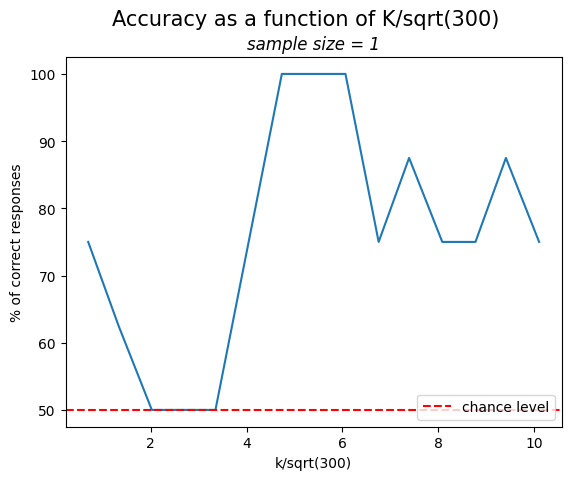

In [73]:
# plotting fraction correct as a function of "clique_size"
# - calculating accuracy for the different levels of "clique_size"
fraction_correct_dict = dict()
# reversing the order of clique_size array:
reversed_clique_size_array = df1_cleaned_final_answers.clique_size.unique()[::-1]
for i in reversed_clique_size_array:
    # isolating data of current clique size:
    current_data = df1_cleaned_final_answers[df1_cleaned_final_answers.clique_size == i]
    # calculating fraction correct for current clique size
    fraction_correct_current_clique_size = sum(current_data.accuracy == True) / sum(~ current_data.accuracy.isna())
    # adding to the dictionary
    fraction_correct_dict[str(round(i))] = fraction_correct_current_clique_size
    
    #CONTROL:
    print("clique size:")
    print(i)
    print("fraction correct:")
    print(fraction_correct_current_clique_size)
    print("--------------------------")
    
# plotting the results:
# - obtaining appropriate x and y values:
x_values = list(fraction_correct_dict.keys())
x_values = [int(x_value)/(math.sqrt(300))  for x_value in x_values]
y_values = list(fraction_correct_dict.values())
y_values = [y_value * 100 for y_value in y_values]
# - drawing plot:
plt.plot(x_values,y_values)
plt.xlabel("k/sqrt(300)")
plt.ylabel("% of correct responses")
# plotting chance level line and adding legend
plt.axhline(y = 50, color = 'r', linestyle = 'dashed', label = "chance level")
plt.legend(loc = 'lower right')
plt.suptitle("Accuracy as a function of K/sqrt(300)", fontsize = 15)
plt.title("sample size = 1", fontstyle= "italic")

Importing multiple csv files, combining them in a single dataframe and removing irrelvant variables:

In [74]:
# creating empty dataframe:
data = pd.DataFrame()
# accessing all json files in 'data' directory:
files = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP-analysis/data_analysis/pilot_1/data/').glob('*.csv')
fileCounter = 0
for file in files:
    # reading single csv file as dataframe
    df = pd.read_csv(file)
    # adding single dataframe to general dataframe:
    data = pd.concat([data,df])
    # incrementing file counter (will be used to label the graph):
    fileCounter += 1

# isolating experiment trials ("canvas-keyboard-response" ones)
data_experiment = data[data.trial_type == "canvas-keyboard-response"]

# dropping irrelevant variables:
data_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1, inplace=True)

# checking that cleaning happened successfully:
print(data_experiment.columns.tolist())
print(data_experiment.shape)

# isolating trials were final responses were given (shuffles have " " as response):
data_experiment_final = data_experiment[data_experiment['response'].isin(['arrowright','arrowleft'])]
print(data_experiment_final.shape)     # final responses = 12*(number of csv files in data folder)
# counting the final answers for each clique size
print(data_experiment_final['clique_size'].value_counts()  )

['trial_type', 'rt', 'response', 'nodes_order', 'correct_response', 'graphs_couple', 'accuracy', 'block_index', 'presentation_index', 'clique_size', 'graph_size']
(3062, 11)
(1200, 11)
175.0    80
163.0    80
152.0    80
140.0    80
128.0    80
117.0    80
105.0    80
93.0     80
82.0     80
70.0     80
58.0     80
47.0     80
35.0     80
23.0     80
12.0     80
Name: clique_size, dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_4592\579251915.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1, inplace=True)


[52.5, 50.0, 51.24999999999999, 68.75, 81.25, 93.75, 97.5, 100.0, 98.75, 97.5, 98.75, 96.25, 97.5, 98.75, 97.5]


Text(0.5, 1.0, 'sample size = 10')

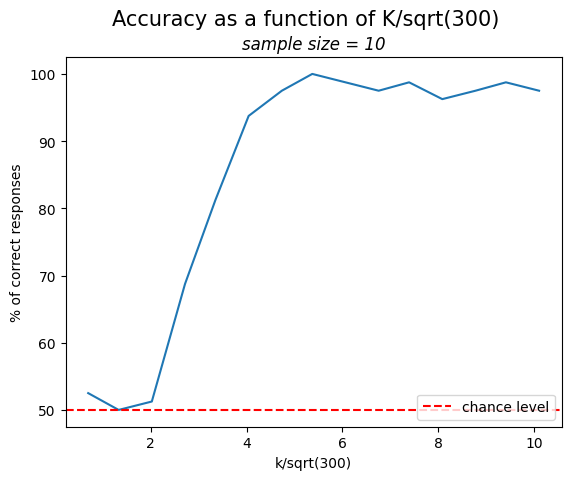

In [75]:
# plotting fraction correct as a function of "clique_size"
# - calculating accuracy for the different levels of "clique_size"
fraction_correct_dict = dict()
# reversing the order of clique_size array:
reversed_clique_size_array = df1_cleaned_final_answers.clique_size.unique()[::-1]
for i in reversed_clique_size_array:
    # isolating data of current clique size:
    current_data = data_experiment_final[data_experiment_final.clique_size == i]
    # calculating fraction correct for current clique size
    fraction_correct_current_clique_size = sum(current_data.accuracy == True) / sum(~ current_data.accuracy.isna())
    # adding to the dictionary
    fraction_correct_dict[str(round(i))] = fraction_correct_current_clique_size
    
    # # DEBUG:
    # print("clique size:")
    # print(i)
    # print("fraction correct:")
    # print(fraction_correct_current_clique_size)
    # print(current_data.accuracy)
    
# plotting the results:
# - obtaining appropriate x and y values:
x_values = list(fraction_correct_dict.keys())
x_values = [int(x_value)/(math.sqrt(300))  for x_value in x_values]
y_values = list(fraction_correct_dict.values())
y_values = [y_value * 100 for y_value in y_values]
print(y_values)
# - drawing plot:
plt.plot(x_values,y_values)
plt.xlabel("k/sqrt(300)")
plt.ylabel("% of correct responses")
# plotting chance level line and adding legend
plt.axhline(y = 50, color = 'r', linestyle = 'dashed', label = "chance level")
plt.legend(loc = 'lower right')
plt.suptitle("Accuracy as a function of K/sqrt(300)", fontsize = 15)
plt.title('sample size = {}'.format(fileCounter), fontstyle= "italic")

Separately calculating accuracy of the different subjects for the various levels of clique size:

In [77]:
# creating empty dataframe:
data = pd.DataFrame()
# accessing all json files in 'data' directory:
files = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP-analysis/data_analysis/pilot_1/data/').glob('*.csv')
# reordering paths so that correspondence with subject number is maintained (otherwise subject 10 data is read first):
files = os_sorted(files)
# reversing the order of clique_size array (in experiment is 175 -> 0, in graph is 0 -> 175):
reversed_clique_size_array = df1_cleaned_final_answers.clique_size.unique()[::-1]
# subject counter (will be used to label the keys of the plot dictionary):
subject_counter = 1
# plot dataframe (rows = subjects ; columns = array of clique sizes. Each line contains the accuracy of that subject for all the clique sizes )
plot_dict = dict()
for file in files:
    
    # # DEBUG:
    # print(file)
    
    # reading single csv file as dataframe
    df = pd.read_csv(file)
    # isolating experiment trials:
    df_experiment = df[df.trial_type == "canvas-keyboard-response"]
    # dropping irrelevant variables:
    df_experiment_cleaned = df_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1)
    # isolating trials of final responses:
    df_experiment_final = df_experiment_cleaned[df_experiment_cleaned['response'].isin(['arrowright','arrowleft'])]
    # creating empty array of accuracies:
    accuracies_for_subject = []
    for i in reversed_clique_size_array:
        # isolating data of current clique size:
        current_data = df_experiment_final[df_experiment_final.clique_size == i]
        # calculating fraction correct for current clique size
        fraction_correct_current_clique_size = sum(current_data.accuracy == True) / sum(~ current_data.accuracy.isna())
        # appending single accuracy to the array of accuracies:
        accuracies_for_subject.append(fraction_correct_current_clique_size)  
    # adding accuracy array to the dictionary
    plot_dict[subject_counter] = accuracies_for_subject
    # increasing subject counter:
    subject_counter += 1

In [97]:
print(plot_dict)
# printing separately the accuracies to check their correctness
accuracies_per_subjects = list(plot_dict.values())
accuracies_per_subjects = [print(subject_accuracies) for subject_accuracies in accuracies_per_subjects]

{1: [0.625, 0.5, 0.375, 0.875, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 2: [0.5, 0.625, 0.625, 0.625, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 3: [0.25, 0.625, 0.5, 0.875, 0.625, 0.875, 0.75, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [0.375, 0.625, 0.625, 0.625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 5: [0.75, 0.25, 0.75, 0.625, 0.875, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 6: [0.625, 0.125, 0.25, 0.5, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0], 7: [0.5, 0.5, 0.625, 0.625, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.25, 0.75, 0.25, 0.875, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 9: [0.75, 0.625, 0.5, 0.5, 0.5, 0.75, 1.0, 1.0, 1.0, 0.75, 0.875, 0.75, 0.75, 0.875, 0.75], 10: [0.625, 0.375, 0.625, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
[0.625, 0.5, 0.375, 0.875, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.5, 0.625, 0.625, 0.625, 0

In [96]:
# creating dataframes of accuracies from dictionary (rows are subjects, columns are clique sizes):
plot_dataframe = pd.DataFrame.from_dict(plot_dict, orient='index',columns=x_values)
# printing dataframe:
print(plot_dataframe)

    0.692820   1.327906   2.020726   2.713546   3.348632   4.041452   \
1       0.625      0.500      0.375      0.875      1.000      0.875   
2       0.500      0.625      0.625      0.625      0.875      1.000   
3       0.250      0.625      0.500      0.875      0.625      0.875   
4       0.375      0.625      0.625      0.625      1.000      1.000   
5       0.750      0.250      0.750      0.625      0.875      0.875   
6       0.625      0.125      0.250      0.500      0.875      1.000   
7       0.500      0.500      0.625      0.625      0.750      1.000   
8       0.250      0.750      0.250      0.875      0.875      1.000   
9       0.750      0.625      0.500      0.500      0.500      0.750   
10      0.625      0.375      0.625      0.750      0.750      1.000   

    4.734272   5.369358   6.062178   6.754998   7.390083   8.082904   \
1        1.00        1.0      1.000       1.00      1.000      1.000   
2        1.00        1.0      1.000       1.00      1.000      

In [122]:
# CREATING DATAFRAME THAT SUITS SWARMPLOT:
# - creating column PERCENT CORRECT (long list of 150 values, 1:15 -> all accuracies for subj 1; 16:30 -> all accuracies for subj 2 ...)
percentage_correct_list = []
for sublist in list(plot_dict.values()):
    for item in sublist:
        percentage_correct_list.append(item)

# - creating column SUBJECT NUMBER (1 (15 times), 2 (15 times)...):
subject_number_list = sorted(list(range(1,11))*15)

# - creating X LABEL COLUMN (clique size transformed according to Rudy's graph):
x_label_list = [round(int(x_value)/(math.sqrt(300)))  for x_value in reversed_clique_size_array]*10

# creating dictionary for swarmplot:
swarmplot_dict = {'percentage_correct': percentage_correct_list, 'subject_number': subject_number_list, 'x_label': x_label_list}

# creating array for clique sizes (ten times 0.692820, ten times 1.327906...):
swarmplot_df = pd.DataFrame.from_dict(swarmplot_dict)
print(swarmplot_df)

     percentage_correct  subject_number  x_label
0                 0.625               1        1
1                 0.500               1        1
2                 0.375               1        2
3                 0.875               1        3
4                 1.000               1        3
..                  ...             ...      ...
145               1.000              10        7
146               1.000              10        8
147               1.000              10        9
148               1.000              10        9
149               1.000              10       10

[150 rows x 3 columns]


<AxesSubplot: xlabel='x_label', ylabel='percentage_correct'>

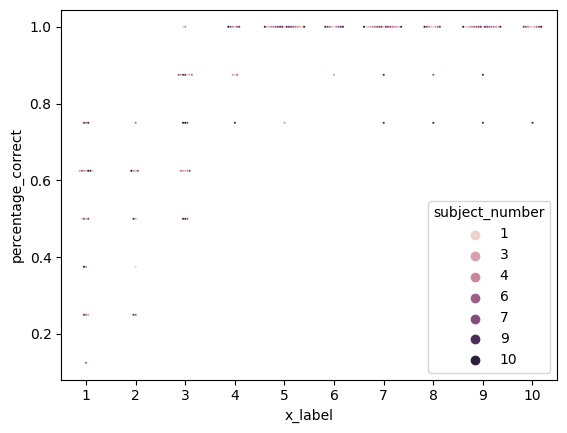

In [147]:
# creating swarmplot:
sns.swarmplot(data=swarmplot_df, x="x_label", y="percentage_correct", hue= "subject_number",size = 1.5)

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danie\AppData\Local\Packages\Py

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\danie\AppData\Local\Packages\Py

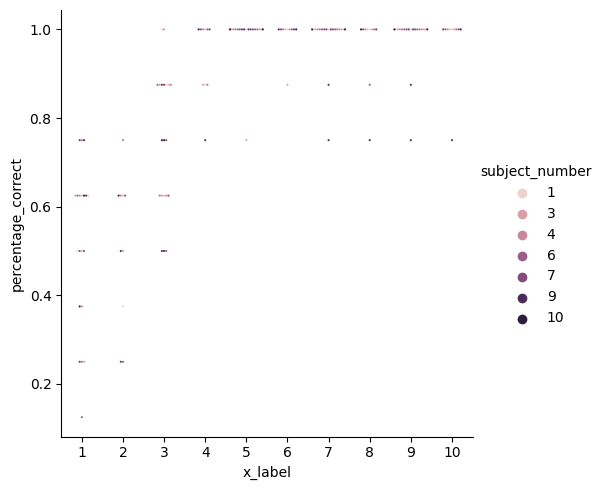

In [146]:
sns.catplot(data=swarmplot_df, kind="swarm", x="x_label", y="percentage_correct", hue= "subject_number",size = 1.5)

<AxesSubplot: xlabel='x_label', ylabel='percentage_correct'>

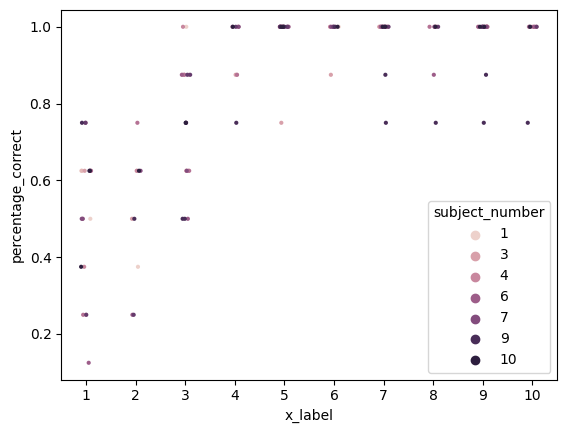

In [145]:
sns.stripplot(data=swarmplot_df,  x="x_label", y="percentage_correct", hue= "subject_number", size = 3)

---------------------------------------------------------------------

(TO ADAPT FROM HERE ON)

- Accuracy:

0.825
[200. 190. 180. 170. 160. 150. 140. 130. 120. 110. 100.  90.  80.  70.
  60.  50.  40.  30.  20.  10.]


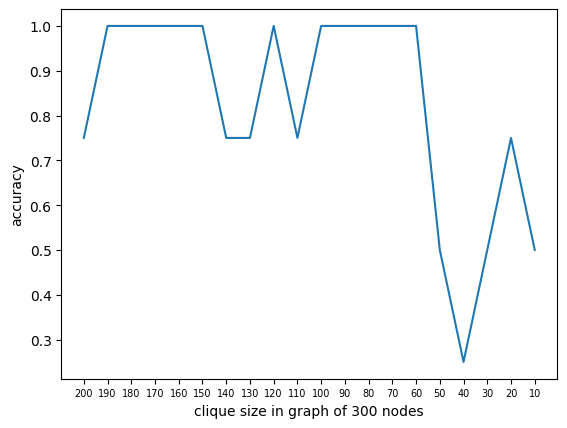

In [6]:
# 1. overall accuracy ( # correct answers / # final answers )
overall_accuracy = sum(data_experiment.correctnessOfResponse == 1) / sum(~ data_experiment.correctnessOfResponse.isna())
print(overall_accuracy)

# 2. calculating accuracy for the levels of "cliqueSize"
# - obtaining levels of "cliqueSize" (this should match with experiment parameters)
print(data_experiment.cliqueSize.unique())
# - calculating accuracy for the different levels of "cliqueSize"
accuracy_dict = dict()
for i in data_experiment.cliqueSize.unique():
    # isolating data of current clique size:
    current_data = data_experiment[data_experiment.cliqueSize == i]
    accuracy_current_cliqueSize = sum(current_data.correctnessOfResponse == 1) / sum(~ current_data.correctnessOfResponse.isna())
    accuracy_dict[str(round(i))] = accuracy_current_cliqueSize
# plotting the results:
x_values = accuracy_dict.keys()
y_values = accuracy_dict.values()
plt.plot(x_values,y_values)
plt.xlabel("clique size in graph of 300 nodes")
plt.ylabel("accuracy")
plt.tick_params(axis='x', which='major', labelsize=7)

- Number of shuffles:

In [7]:
# 1. average number of shuffles
# 2. calculating number of shuffles for the levels of "cliqueSize"  (plotting the results)
# note: if number of shuffles increases as a function of "cliqueSize", it could be helping subjects for difficult instances of the task

- Reaction times:

False    391
True       4
Name: rt, dtype: int64


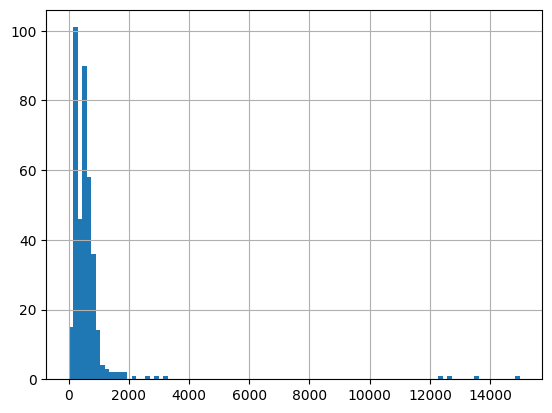

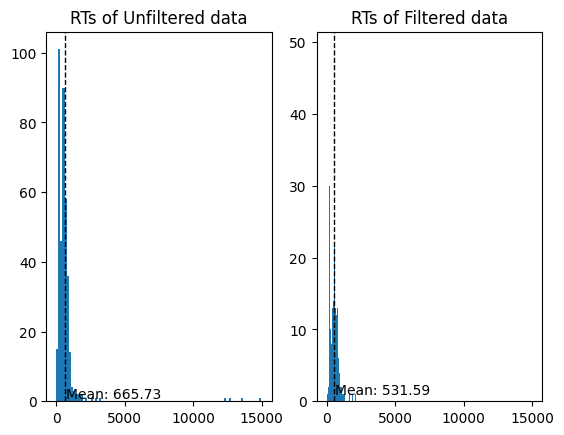

In [8]:
# 1. average RT (for all trials, both final responses and shuffles)
# 2. RT as a function of "cliqueSize"
# note: if reaction time increases as a function of "cliqueSize", it could be an indication of increasing difficulty

###########################################################


# histogram of reaction times distribution (TO REVIEW):
data.rt.hist(bins=100)
# counting trials that were too slow and removing them (exclusion criterion: rt>7500)
print((data.rt>=7500).value_counts())
data_filtered = data.query('rt < 7500')

#plotting unfiltered and filtered data:
fig, (ax1,ax2) = plt.subplots(1, 2,sharex=True)
min_ylim, max_ylim = plt.ylim()
#unfiltered data
ax1.hist(data.rt,bins=100)
ax1.axvline(data.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax1.text(data.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data.rt.mean()))
ax1.set_title("RTs of Unfiltered data")
#filtered data
ax2.hist(data_filtered.rt,bins=100)
ax2.axvline(data_filtered.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax2.text(data_filtered.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data_filtered.rt.mean()))
ax2.set_title("RTs of Filtered data")
plt.show()